### 1. Read the dataset to the python environment

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel('iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Analyse the data and preprocessing data

In [71]:
df.shape

(150, 5)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [73]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Dataset is having null values in the fields SL,SW and PL and we have to handle the null values

In [74]:
df.duplicated().sum()

3

Dataset is having duplicate records also, so we can handle duplicate records first

### Handling duplicates

In [75]:
#dropping the duplicates using drop_duplicates function
df.drop_duplicates(inplace=True)

In [76]:
df.shape

(147, 5)

### Handling Null Values

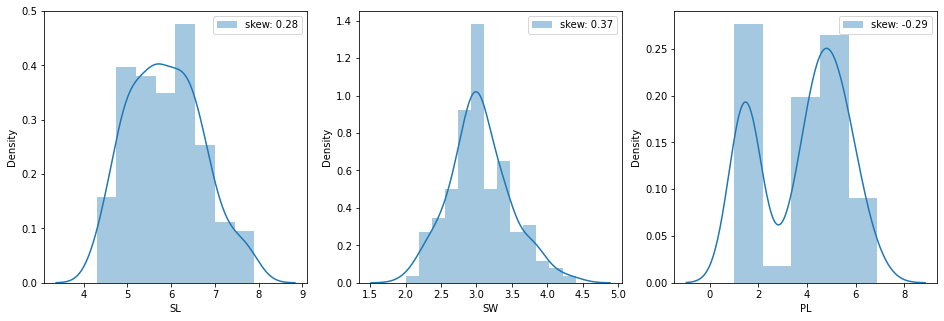

In [77]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,5))
plt.subplot(131)
sns.distplot(df['SL'],label='skew: '+ str(np.round(df['SL'].skew(),2)))
plt.legend()
plt.subplot(132)
sns.distplot(df['SW'],label='skew: '+ str(np.round(df['SW'].skew(),2)))
plt.legend()
plt.subplot(133)
sns.distplot(df['PL'],label='skew: '+ str(np.round(df['PL'].skew(),2)))
plt.legend()
plt.show()

As per the plots and skewness, the skewness is falls in between -0.29 and 0.5 respectively for SL,SW and PL, so this can be assumed as nearly symmetrical. So we can use either mean or median to fill the missing value

In [78]:
for i in ['SL','SW','PL']:
    df[i] = df[i].fillna(df[i].median())

In [79]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

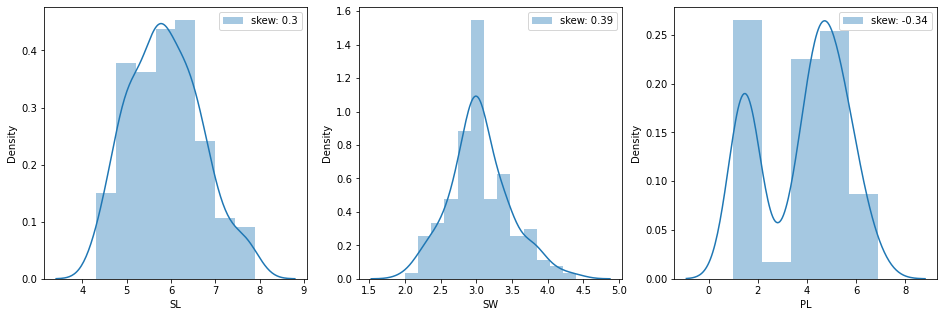

In [80]:
#replotting the graph again
plt.figure(figsize=(16,5))
plt.subplot(131)
sns.distplot(df['SL'],label='skew: '+ str(np.round(df['SL'].skew(),2)))
plt.legend()
plt.subplot(132)
sns.distplot(df['SW'],label='skew: '+ str(np.round(df['SW'].skew(),2)))
plt.legend()
plt.subplot(133)
sns.distplot(df['PL'],label='skew: '+ str(np.round(df['PL'].skew(),2)))
plt.legend()
plt.show()

### Handling outliers

<AxesSubplot:>

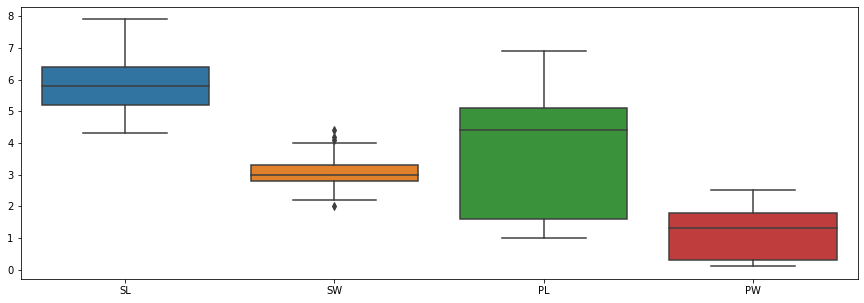

In [81]:
# checking whether there is any outliers present in the dataset for any feature
plt.figure(figsize=(15,5))
sns.boxplot(data=df)

There are outliers present in the SW column and we have to handle that

In [82]:
Q1=np.percentile(df['SW'],25)
Q2=np.percentile(df['SW'],50)
Q3=np.percentile(df['SW'],75)

IQR = Q3-Q1

UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

print('Lower limit is :',LL)
print('Upper limit is :',UL)

Lower limit is : 2.05
Upper limit is : 4.05


In [83]:
outlier = []
for i in df['SW']:
    if ((i>UL) | (i<LL)):
        outlier.append(i)

In [84]:
outlier

[4.4, 4.1, 4.2, 2.0]

In [85]:
ind = df[(df['SW'] < LL) | (df['SW'] > UL)]
df.drop(ind.index,inplace=True)

In [86]:
df.shape

(143, 5)

<AxesSubplot:>

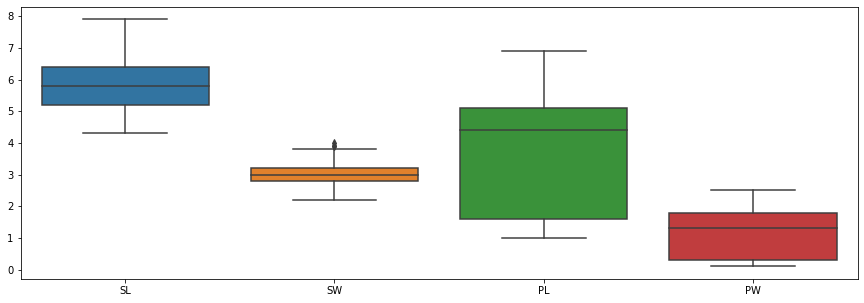

In [87]:
# replotting the boxplot to check whetjer outliers are handled
plt.figure(figsize=(15,5))
sns.boxplot(data=df)

In [88]:
df[(df['SW'] < LL) | (df['SW'] > UL)]

,SL,SW,PL,PW,Classification


Outliers are handled and there are no more outliers in the SW field

In [89]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Encoding the classification field

In [92]:
df['Classification'].value_counts()

Iris-virginica     49
Iris-versicolor    49
Iris-setosa        45
Name: Classification, dtype: int64

In [93]:
# encoding the classification rusing label encoder
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()
df['Classification']= en.fit_transform(df['Classification'])

In [94]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [95]:
df['Classification'].value_counts()

1    49
2    49
0    45
Name: Classification, dtype: int64

<AxesSubplot:>

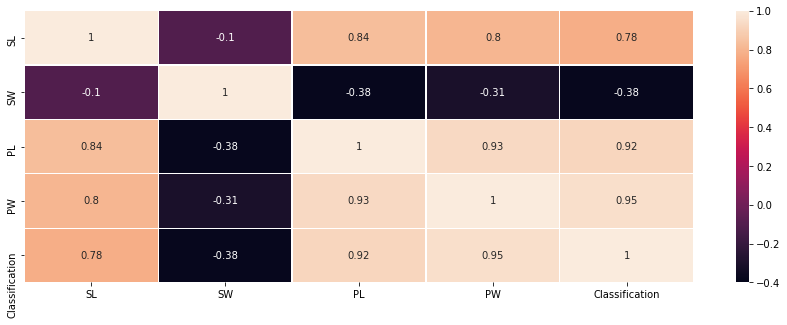

In [99]:
#finding the correlation between features
corrmatrix= df.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=1, annot= True, linewidth= 0.2)

### Building the model and model selection

In [96]:
#splitting the model to X and y
X= df.drop('Classification',axis=1)
y = df['Classification']

In [97]:
#importing train_test_split and creating train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [101]:
#creating the empty list to display the accuracy and f1 score after running all models
models=['RandomForest','LogisticRegression','DecisionTree','SVC','KNN']
model_test_acc=[]
model_test_f1_score = []

#### RandomForest model

In [102]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred),3)
test_f1 =  np.round(f1_score(y_test,y_pred,average='weighted'),3)

model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)

print("F1 Score on test data using RandomForest tree: ",test_f1)
print("Accuracy Score on test data using RandomForest tree: ",test_acc)

F1 Score on test data using RandomForest tree:  0.896
Accuracy Score on test data using RandomForest tree:  0.897


<AxesSubplot:>

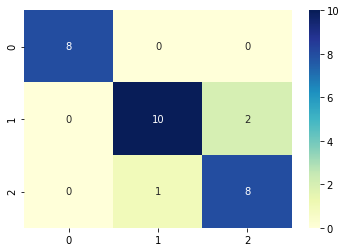

In [105]:
#confusion matrix of random forest model
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap="YlGnBu")

#### LogisticRegression model

In [106]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred),3)
test_f1 =  np.round(f1_score(y_test,y_pred,average='weighted'),3)

model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)

print("F1 Score on test data using LogisticRegression: ",test_f1)
print("Accuracy Score on test data using LogisticRegression: ",test_acc)

F1 Score on test data using LogisticRegression:  0.864
Accuracy Score on test data using LogisticRegression:  0.862


<AxesSubplot:>

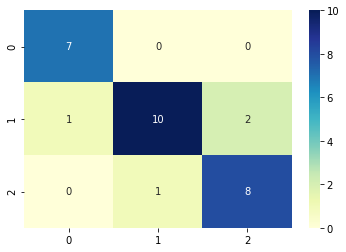

In [108]:
#confusion matrix of Logistic regression model
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap="YlGnBu")

#### DecisionTree model

In [109]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred),3)
test_f1 =  np.round(f1_score(y_test,y_pred,average='weighted'),3)

model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)

print("F1 Score on test data using DecisionTree: ",test_f1)
print("Accuracy Score on test data using DecisionTree: ",test_acc)

F1 Score on test data using DecisionTree:  0.896
Accuracy Score on test data using DecisionTree:  0.897


<AxesSubplot:>

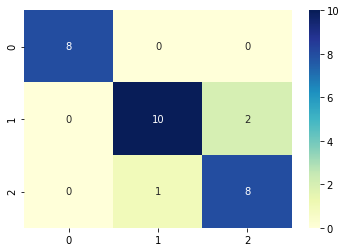

In [110]:
#confusion matrix of DecisionTree model
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap="YlGnBu")

#### SVC model

In [111]:
svm= SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred),3)
test_f1 =  np.round(f1_score(y_test,y_pred,average='weighted'),3)

model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)

print("F1 Score on test data using SVM: ",test_f1)
print("Accuracy Score on test data using SVM: ",test_acc)

F1 Score on test data using SVM:  0.862
Accuracy Score on test data using SVM:  0.862


<AxesSubplot:>

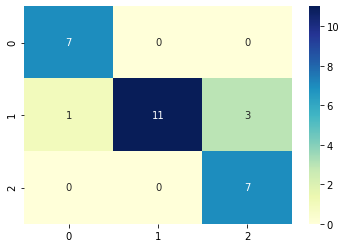

In [112]:
#confusion matrix of SVM model
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap="YlGnBu")

#### KNN model

In [114]:
accuracy = []
neighbors = np.arange(1,12)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_pred,y_test)
    accuracy.append(acc)

In [115]:
accuracy

[0.8620689655172413,
 0.896551724137931,
 0.8275862068965517,
 0.896551724137931,
 0.8620689655172413,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207]

<AxesSubplot:>

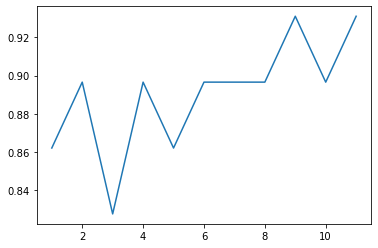

In [116]:
sns.lineplot(x=neighbors,y=accuracy)

In [117]:
#Since accuracy score is good for 9 and 11, we can select 9 as k

classifier = KNeighborsClassifier(n_neighbors=9, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred),3)
test_f1 =  np.round(f1_score(y_test,y_pred,average='weighted'),3)

model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)

print("F1 Score on test data using KNN: ",test_f1)
print("Accuracy Score on test data using KNN: ",test_acc)

F1 Score on test data using KNN:  0.932
Accuracy Score on test data using KNN:  0.931


<AxesSubplot:>

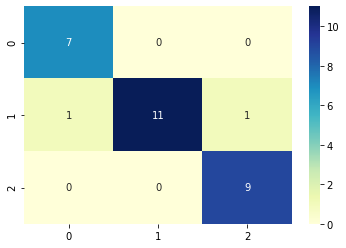

In [118]:
#confusion matrix of KNN model
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap="YlGnBu")

In [119]:
#displaying the accuracy and f1 score of each models
model_performance = pd.DataFrame({
    'model':models,
    'f1_score':model_test_f1_score,
    'accuracy':model_test_acc
})
model_performance

,model,f1_score,accuracy
0,RandomForest,0.896,0.897
1,LogisticRegression,0.864,0.862
2,DecisionTree,0.896,0.897
3,SVC,0.862,0.862
4,KNN,0.932,0.931


Its clear that f1_score and accuracy is higher for KNN model.Hence KNN  model can be selected as the best model among the five